In [1]:
from pyetc2.specalib import *

In [2]:
phot_system = PhotometricSystem()
sed_models = SEDModels()
filter_manager = FilterManager(phot_system)

In [3]:
sed_models.eso_spectra_files

{'Pickles_O5V': 'ESO_original_spectra/Pickles_O5V.dat',
 'Kinney_starb5': 'ESO_original_spectra/Kinney_starb5.dat',
 'Kinney_starb4': 'ESO_original_spectra/Kinney_starb4.dat',
 'Kinney_sa': 'ESO_original_spectra/Kinney_sa.dat',
 'Kinney_starb6': 'ESO_original_spectra/Kinney_starb6.dat',
 'Pickles_O9V': 'ESO_original_spectra/Pickles_O9V.dat',
 'Kinney_sb': 'ESO_original_spectra/Kinney_sb.dat',
 'Galev_E': 'ESO_original_spectra/Galev_E.dat',
 'Pickles_B2IV': 'ESO_original_spectra/Pickles_B2IV.dat',
 'Kinney_s0': 'ESO_original_spectra/Kinney_s0.dat',
 'Kinney_starb3': 'ESO_original_spectra/Kinney_starb3.dat',
 '.DS_Store': 'ESO_original_spectra/.DS_Store',
 'Kinney_starb2': 'ESO_original_spectra/Kinney_starb2.dat',
 'Pickles_A0III': 'ESO_original_spectra/Pickles_A0III.dat',
 'Kinney_starb1': 'ESO_original_spectra/Kinney_starb1.dat',
 'Pickles_A0V': 'ESO_original_spectra/Pickles_A0V.dat',
 'Pickles_K2V': 'ESO_original_spectra/Pickles_K2V.dat',
 'Kurucz_B8V': 'ESO_original_spectra/Kurucz_B8

### TEMPLATES

<IPython.core.display.Javascript object>


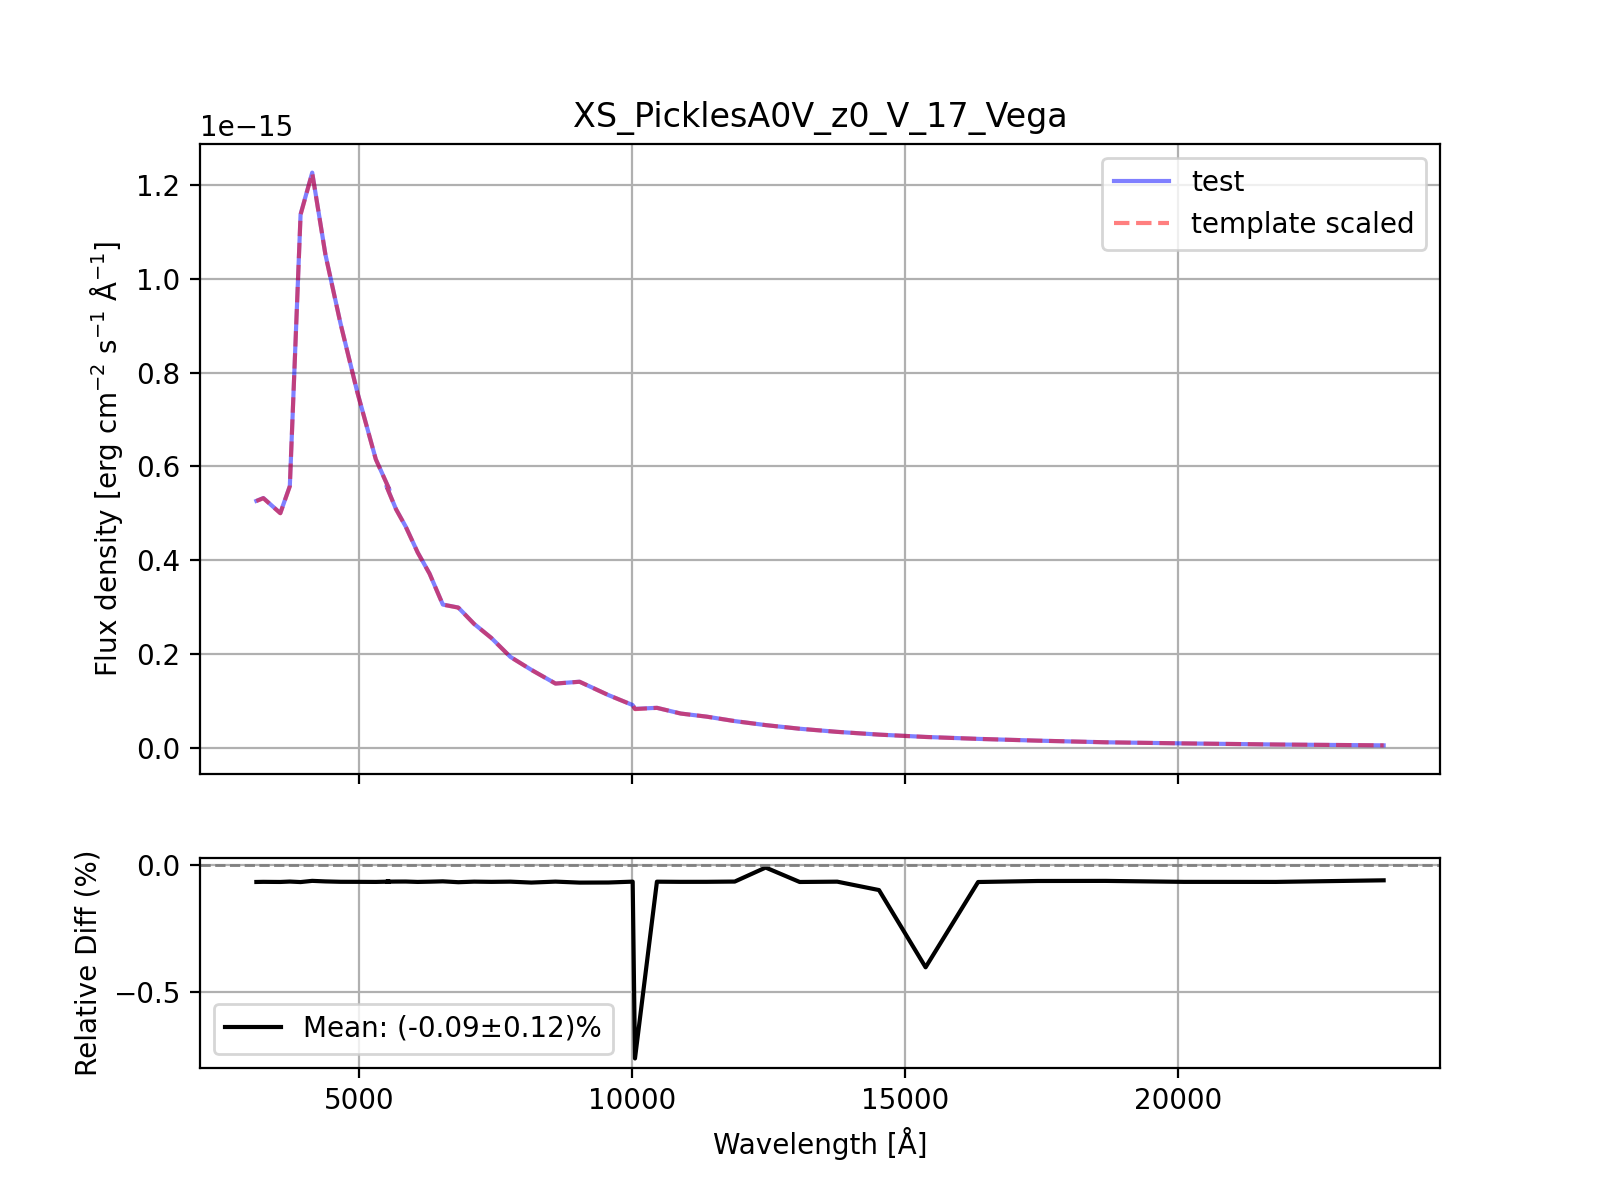

In [4]:
%matplotlib notebook
nameT, waveT, fluxT =  sed_models.template('spectra_to_test/XS_PicklesA0V_z0_V_17_Vega.txt', 
                                           waveunit='nm')

#### PARAMETERS
name, wave, flux =  sed_models.template('Pickles_A0V.dat')
redshift = 0
band = 'V'
mag = 17
syst = 'Vega'
###############


mag, syst = phot_system.auto_conversion(mag, band, syst)

#redshift correction
wave *= (1+redshift)

_, _, K = filter_manager.apply_filter(wave, flux, band, mag, syst)
plot_spectra_comparison(waveT, fluxT, wave, flux*K, 'test','template scaled', nameT, namepng=nameT)

### BLACKBODY

In [5]:
#A wide range to ensure the normalization to work correctly in every filter of choice 
DEFAULT_WAVE = np.linspace(100,30000,10000)

<IPython.core.display.Javascript object>


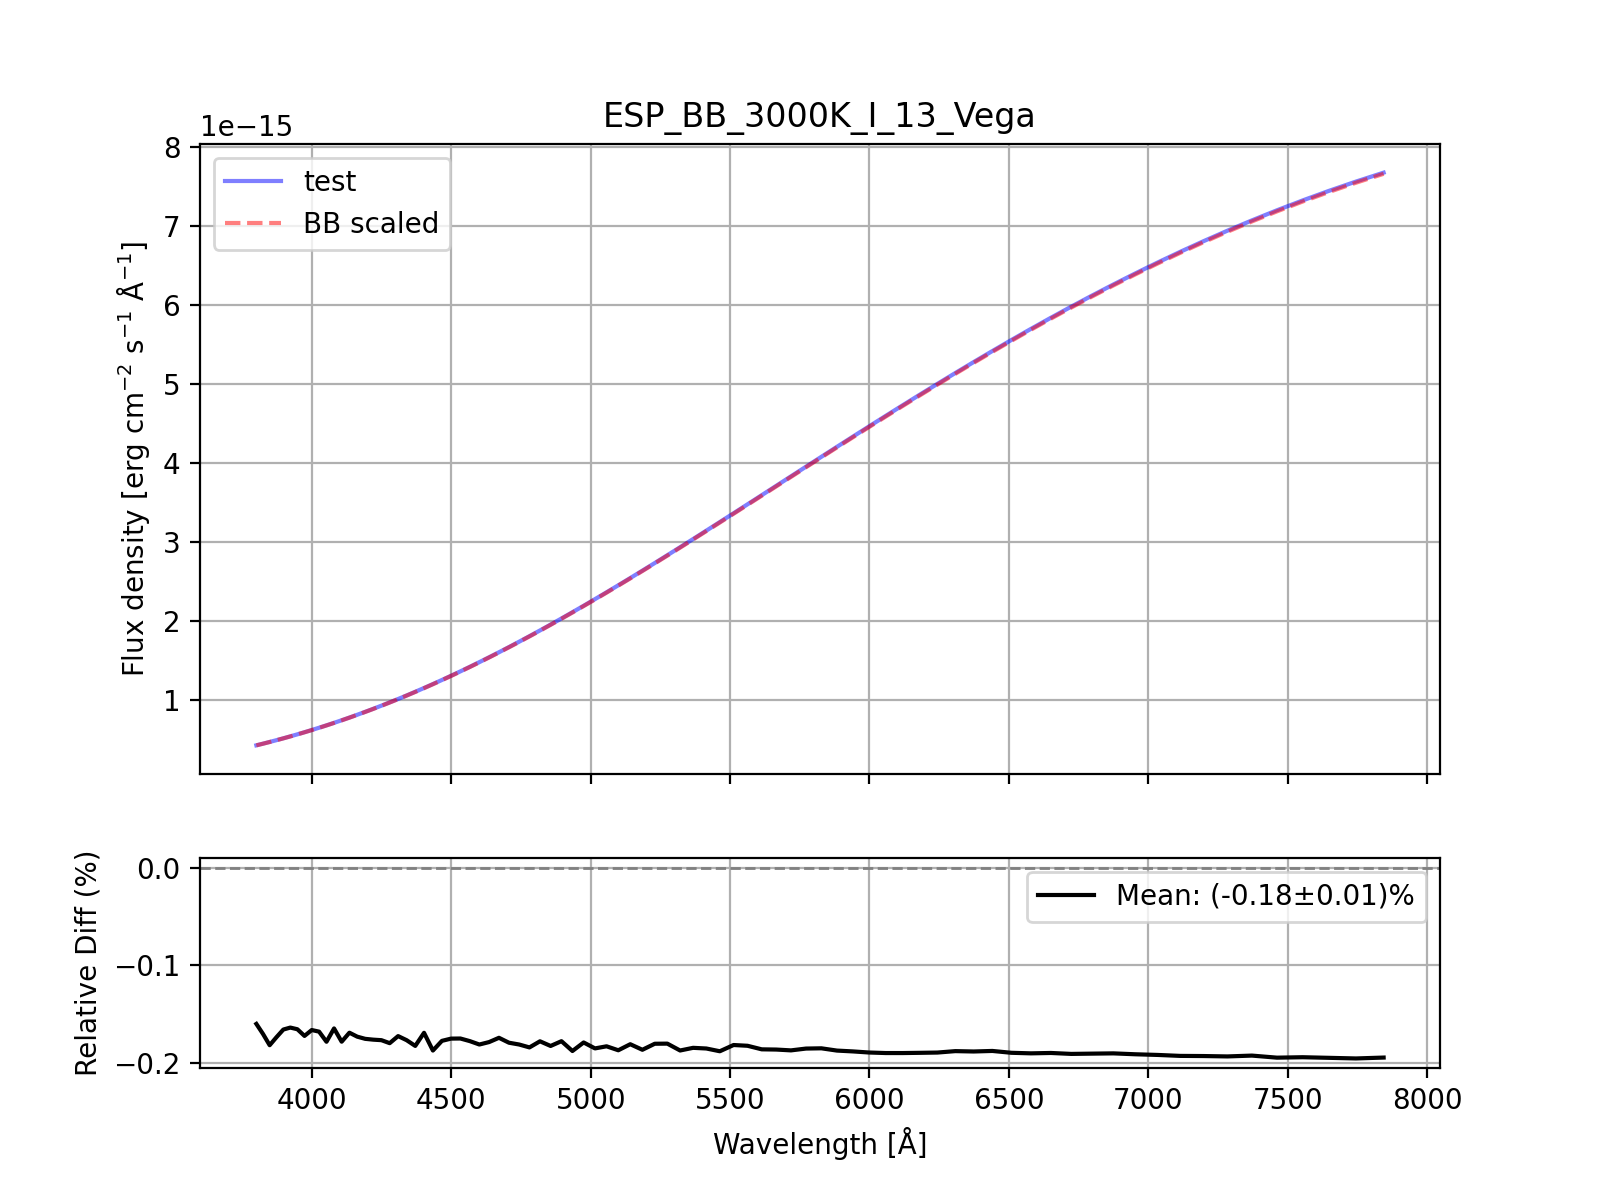

In [6]:
%matplotlib notebook
nameT, waveT, fluxT =  sed_models.template('spectra_to_test/ESP_BB_3000K_I_13_Vega.txt', 
                                           waveunit='nm')

#### PARAMETERS
band = 'I'
mag = 13
syst = 'Vega'
tmp = 3000
###############


flux =  sed_models.blackbody(DEFAULT_WAVE,tmp)

mag, syst = phot_system.auto_conversion(mag, band, syst)

_, _, K = filter_manager.apply_filter(DEFAULT_WAVE, flux, band, mag, syst)

plot_spectra_comparison(waveT, fluxT, DEFAULT_WAVE, flux*K, 'test','BB scaled', nameT, namepng=nameT)

### POWERLAW

<IPython.core.display.Javascript object>


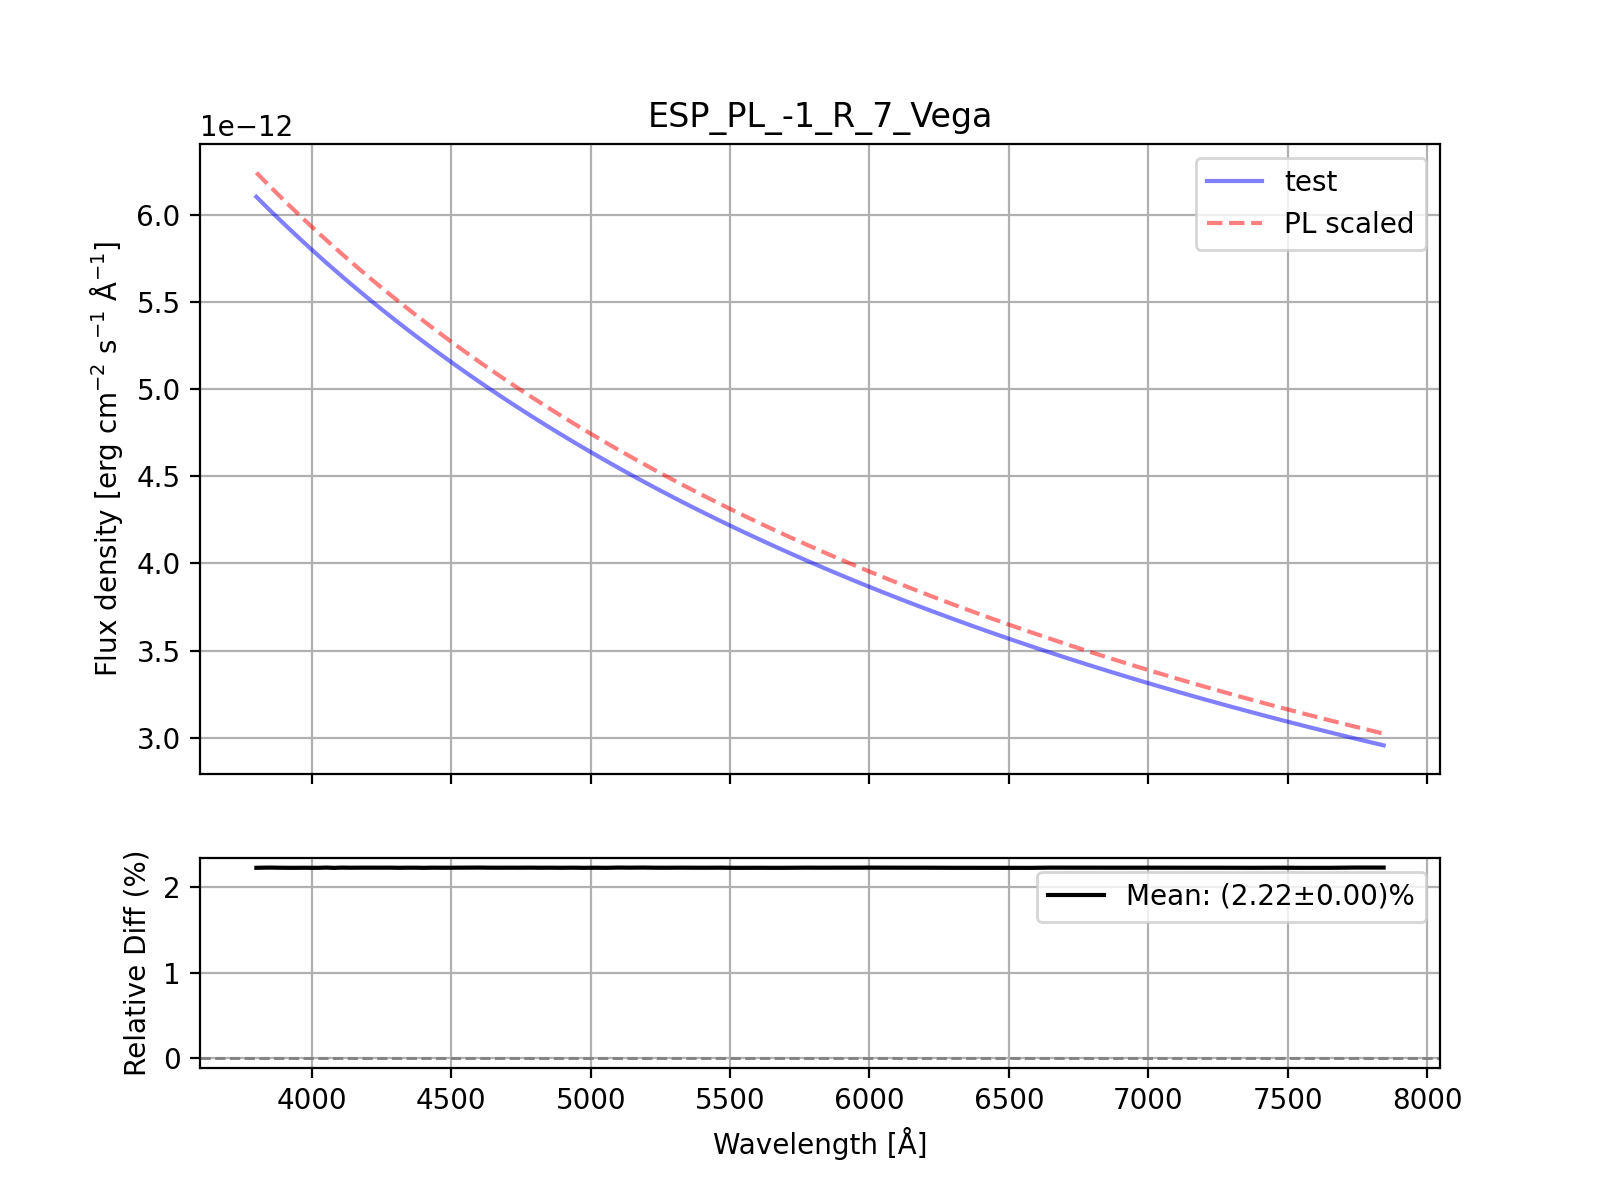

In [7]:
%matplotlib notebook
nameT, waveT, fluxT =  sed_models.template('spectra_to_test/ESP_PL_-1_R_7_Vega.txt', 
                                           waveunit='nm')

#### PARAMETERS
band = 'R'
mag = 7
syst = 'Vega'
indpl = -1
###############


flux =  sed_models.powerlaw(DEFAULT_WAVE, indpl)

mag, syst = phot_system.auto_conversion(mag, band, syst)

_, _, K = filter_manager.apply_filter(DEFAULT_WAVE, flux, band, mag, syst)

plot_spectra_comparison(waveT, fluxT, DEFAULT_WAVE, flux*K, 'test','PL scaled', nameT, namepng=nameT)

### LINE

<IPython.core.display.Javascript object>


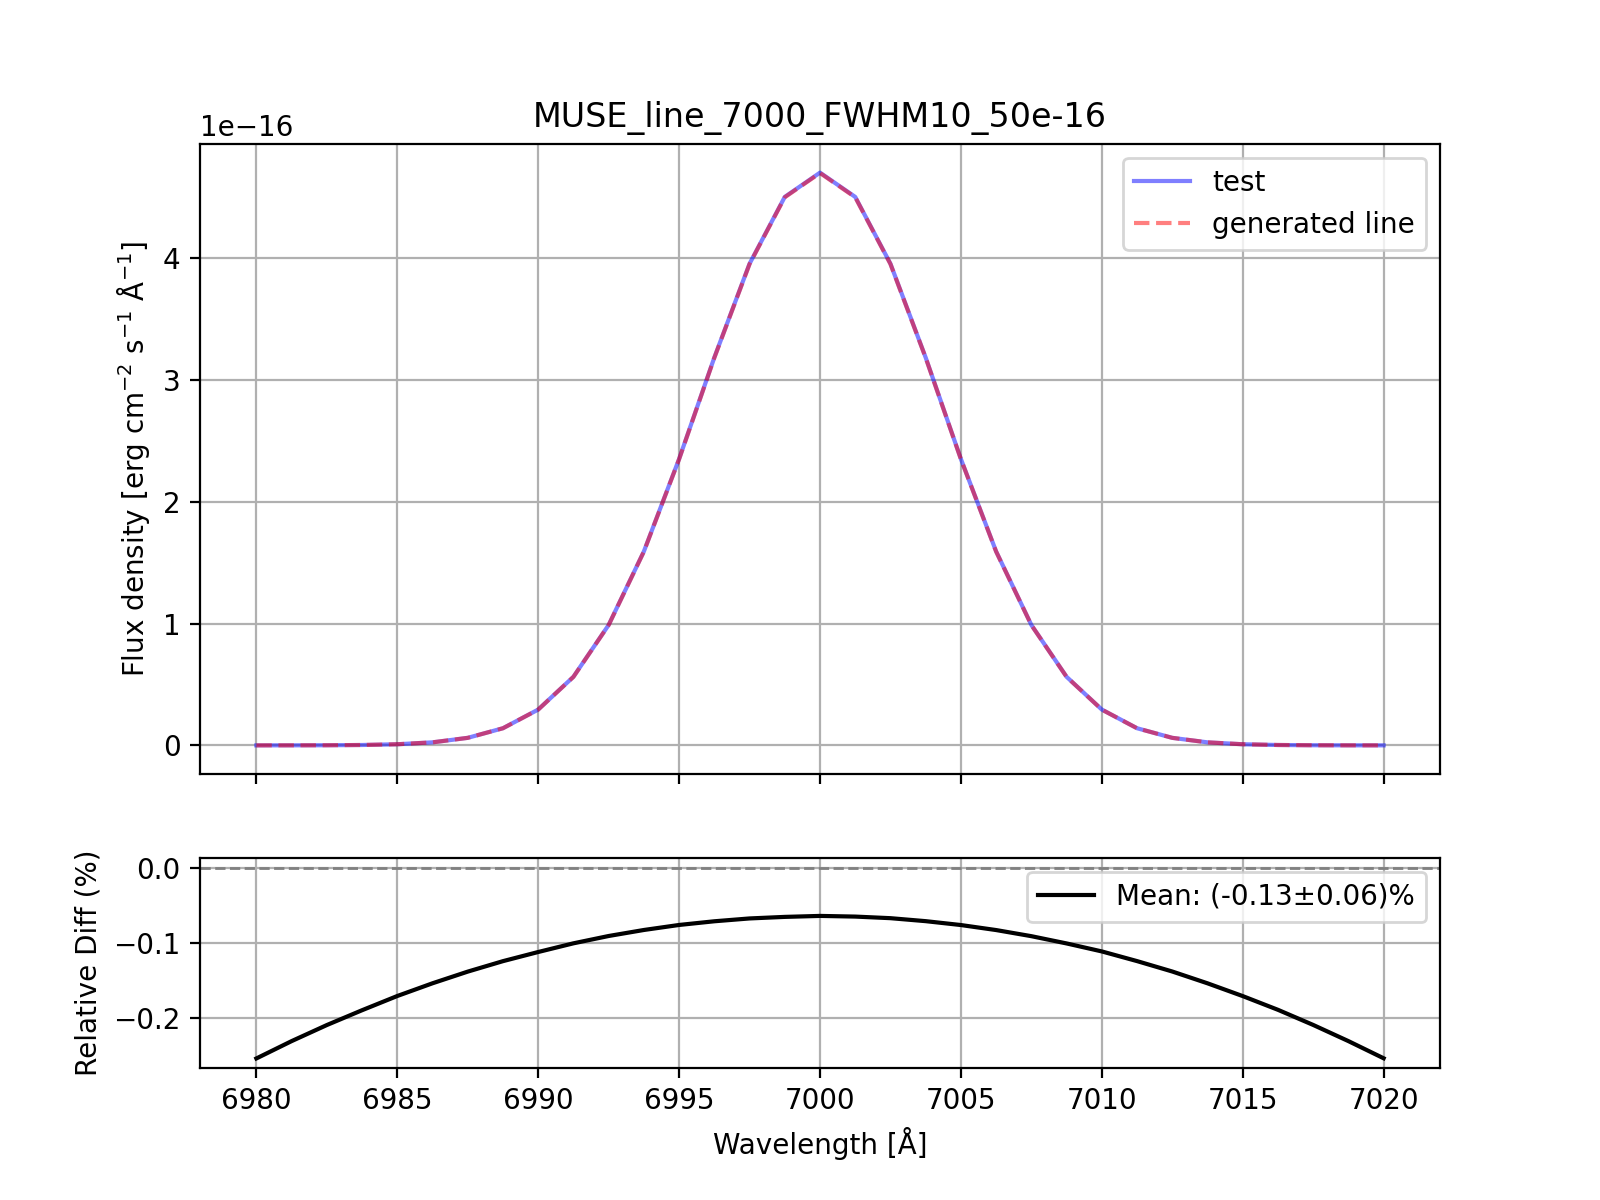

In [8]:
%matplotlib notebook
nameT, waveT, fluxT =  sed_models.template('spectra_to_test/MUSE_line_7000_FWHM10_50e-16.txt', 
                                           waveunit='nm', unitsf='PHll')
#### PARAMETERS
center = 7000 #in AA
fwhm = 10 #in AA
fwhm_mult = 2 #how much to draw around the center in times of FWHM
tot_flux = 50e-16 #in erg / cm^2 s
###############

tolerance = fwhm_mult * fwhm
fluxT = fluxT[(waveT >= center - tolerance) & (waveT <= center + tolerance)]
waveT = waveT[(waveT >= center - tolerance) & (waveT <= center + tolerance)]

flux = sed_models.gaussian_line(waveT, center, tot_flux, fwhm)

plot_spectra_comparison(waveT, fluxT, waveT, flux, 'test','generated line', nameT, namepng=nameT)